In [169]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as sp


In [170]:
# データの読み込み
train = pd.read_csv('../data/train.tsv', sep='\t')

In [171]:
train.head()

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high


In [172]:
# ユニークな値を表示
for column in train.columns:
    if column == 'id':
        continue
    print('==========================')
    print(f'カラム名: {column}')
    print(train[column].value_counts())

カラム名: class
unacc    591
acc      206
good      34
vgood     33
Name: class, dtype: int64
カラム名: buying
low      226
med      219
high     218
vhigh    201
Name: buying, dtype: int64
カラム名: maint
high     227
vhigh    225
low      219
med      193
Name: maint, dtype: int64
カラム名: doors
3        238
4        220
5more    208
2        198
Name: doors, dtype: int64
カラム名: persons
more    299
2       284
4       281
Name: persons, dtype: int64
カラム名: lug_boot
med      299
big      285
small    280
Name: lug_boot, dtype: int64
カラム名: safety
high    291
med     289
low     284
Name: safety, dtype: int64


# データ説明

class: 評価値（unacc, acc, good, vgood）<br>
buying: 車の売値（vhigh, high, med, low）<br>
maint: 整備代（vhigh, high, med, low）<br>
doors: ドアの数（2, 3, 4, 5, more.）<br>
persons: 定員（2, 4, more.）<br>
lug_boot: トランクの大きさ（small, med, big.）<br>
safety: 安全性（low, med, high）<br>

# 関数の定義

In [173]:
# クロス集計表を作成する関数
def make_cross(x, y, x_unique_elem, y_unique_elem):
    tb = pd.crosstab(x, y)
    tb = tb.reindex(index=x_unique_elem, columns=y_unique_elem)
    return tb

# 売値（buying）と評価値

In [174]:
x_unique_elem=['low','med','high','vhigh']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_buying=make_cross(train['buying'], train['class'], x_unique_elem, y_unique_elem)
tb_class_buying

class,unacc,acc,good,vgood
buying,,,,
low,128,53,24,21
med,134,63,10,12
high,163,55,0,0
vhigh,166,35,0,0


<AxesSubplot:xlabel='buying'>

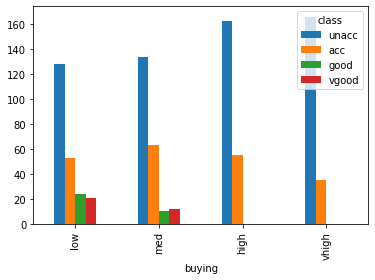

In [175]:
tb_class_buying.plot.bar()

In [176]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_buying)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 97.02246234028553
p値: 6.287080004439039e-17
自由度: 9


### 売値が高いほど評価値は高い

# 整備代（maint）と評価値

In [177]:
x_unique_elem=['low','med','high','vhigh']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_maint=make_cross(train['maint'], train['class'], x_unique_elem, y_unique_elem)
tb_class_maint

class,unacc,acc,good,vgood
maint,,,,
low,131,52,23,13
med,115,53,11,14
high,165,56,0,6
vhigh,180,45,0,0


<AxesSubplot:xlabel='maint'>

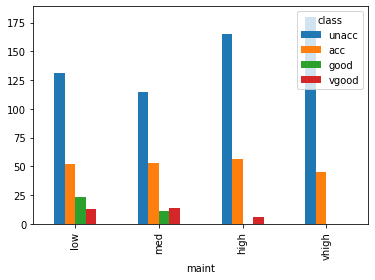

In [178]:
tb_class_maint.plot.bar()

In [179]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_maint)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 73.36569222532016
p値: 3.3195021898911677e-12
自由度: 9


### 整備代が高いほど評価値は高い

# ドアの数と評価値

In [180]:
x_unique_elem=['2','3','4','5more']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_doors=make_cross(train['doors'], train['class'], x_unique_elem, y_unique_elem)
tb_class_doors

class,unacc,acc,good,vgood
doors,,,,
2,143,43,8,4
3,160,58,10,10
4,146,53,10,11
5more,142,52,6,8


<AxesSubplot:xlabel='doors'>

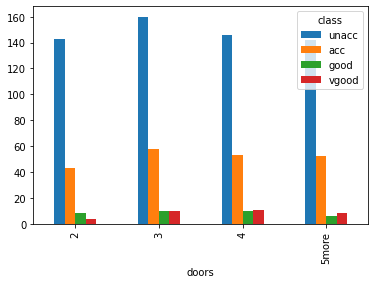

In [181]:
tb_class_doors.plot.bar()

In [182]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_doors)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 4.542617561654593
p値: 0.8722205310598203
自由度: 9


In [183]:
### ドアの数と評価値に有意差はない

# 定員（persons）と評価値

In [184]:
x_unique_elem=['2','4','more']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_persons=make_cross(train['persons'], train['class'], x_unique_elem, y_unique_elem)
tb_class_persons

class,unacc,acc,good,vgood
persons,,,,
2,284,0,0,0
4,145,104,19,13
more,162,102,15,20


<AxesSubplot:xlabel='persons'>

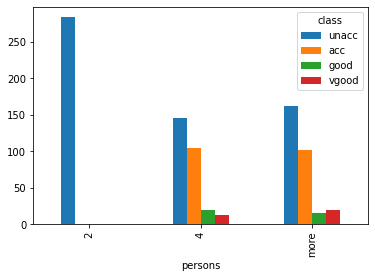

In [185]:
tb_class_persons.plot.bar()

In [186]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_persons)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 198.80968750727712
p値: 3.4005353569416905e-40
自由度: 6


### ドアの数と評価値に有意差はない

# トランク（lug_boot）の大きさと評価値

In [188]:
x_unique_elem=['small','med','big']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_lug=make_cross(train['lug_boot'], train['class'], x_unique_elem, y_unique_elem)
tb_class_lug

class,unacc,acc,good,vgood
lug_boot,,,,
small,217,52,11,0
med,201,71,14,13
big,173,83,9,20


<AxesSubplot:xlabel='lug_boot'>

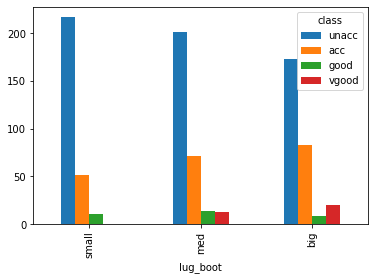

In [189]:
tb_class_lug.plot.bar()

In [190]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_lug)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 31.922757711296384
p値: 1.6883424349184776e-05
自由度: 6


### トランクが大きいほど評価値は高い

# 安全性（safety）と評価値

In [191]:
x_unique_elem=['low','med','high']
y_unique_elem=['unacc','acc','good','vgood']

tb_class_safety=make_cross(train['safety'], train['class'], x_unique_elem, y_unique_elem)
tb_class_safety

class,unacc,acc,good,vgood
safety,,,,
low,284,0,0,0
med,170,101,18,0
high,137,105,16,33


<AxesSubplot:xlabel='safety'>

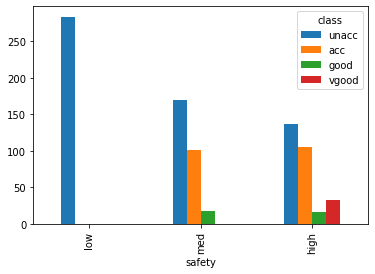

In [192]:
tb_class_safety.plot.bar()

In [193]:
# χ二乗検定
x2, p, dof, ex = sp.stats.chi2_contingency(tb_class_safety)

print(f'カイ二乗値: {x2}')
print(f'p値: {p}')
print(f'自由度: {dof}')

カイ二乗値: 247.4439001379002
p値: 1.4425255105596875e-50
自由度: 6


### 安全性が高いものほど評価値は高い